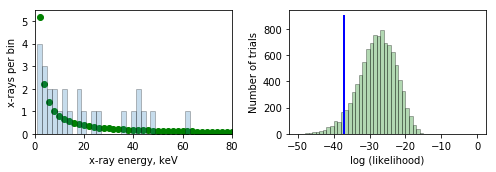

('Fraction of trials with lower likelihood: ', 0.055)
('Hypothesis of model rejected with confidence: ', 0.945)


In [2]:
#Program likelihood_poissonerror.py
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as ran
import scipy.stats as stat

#Define number of trials (number of datasets to generate) and
#number of data points per trial
ntrials = 10000
npoints = 4

#Generate the real data set, and bin into 5 keV bins 0-100 keV:
binedges=np.linspace(0.,98.,50)+1.
bincenters = (binedges[0:49]+binedges[1:50])/2.

#These are energies of individual photons in keV.  I have made something like my
#hypothetical model but have added some extra counts near 40 keV -- something
#interesting may be going on in this neutron star right now!
energies=[1.7,23.,5.,17.,35.,8.2,11.5,3.3,4.4,2.1,9.0,11.7, 42., 62., 20., 6.,7.,14.7,
          25.1,18.3,2.1,0.8,0.15,1.3,3.2,0.7,43.5,48.2,41.0,40.4]
#We need to bin it for use in calculations as well as plotting
#(which happens in the histogram plotting routine automatically).
datahist,edgeshist = np.histogram(energies,binedges)

#Here is the model function, just for reference; we will only use its integral
#over our binning. This is the usual behavior of the neutron star, i.e. our
#null hypothesis:
def hypothesis(x):
    return 5.*x**(-1.1)
#Generate the hypothesis integrated over the bins we have chosen, which is
#what we are going to use.  
def hypothesis_integrated(x):
    thesize = np.shape(x)[0]
    return 5./0.1 * (x[0:thesize-1]**(-0.1) - x[1:thesize]**(-0.1))

#Here is the model integrated over each bin. Note that you can make these
#bins even smaller if you like, so that each contains only 0 or 1 counts.
#Real x-ray detectors have their own natural (instrumental) binning,
#so we'll say that this is what we are representing.
ymodel = hypothesis_integrated(binedges)

#Make the first plot, with the "real" data shown as a blue histogram
#and the model integrated over the instrumental bins shown as green points.
plt.figure(1,figsize=[7,2.5])
plt.subplot(121)
plt.xlim(0,80)
plt.ylim(0,5.5)
plt.xlabel('x-ray energy, keV')
plt.ylabel('x-rays per bin')
plt.hist(energies,binedges,alpha=0.25,ec='black')
plt.scatter(bincenters,ymodel,marker='o',color='green')

#Define the likelihood function for data y and model ymodel.  In
#this example it's a Poisson error distribution.  Note that unlike the case of 
#likelihood_gausserror.ipynb, we don't specify the magnitude of errors explicitly,
#since they are implicity in the nature of Poisson statistics:
def likelihood(y,ymodel):
    return stat.poisson.pmf(y,ymodel)

#Now calculate the likelihood for the actual data.  The function np.prod
#takes the product of all the elements in the array it's given as an
#argument -- this is the overall likelihood product. Each element in the
#array is the likelihood for each data point.
data_likelies = likelihood(datahist,ymodel)
data_overall = np.prod(data_likelies) 

#Make "ntrials" artificial datasets 
trials_overall = np.empty(ntrials)
for j in range(0,ntrials):
    #One line each to make the artificial Poisson data across the whole
    #spectrum (a different lambda for each bin), turn each bin
    #into a probability, and mulitply all the probabilities together:
    ytrial = ran.poisson(lam=ymodel,size=np.shape(ymodel)[0])
    trial_likelies = likelihood(ytrial,ymodel)
    trials_overall[j] = np.prod(trial_likelies)
    
#Take the log of the likelihoods for plotting purposes, since the likelihood values
#themselves run over many orders of magnitude for the trials.  Of course taking
#the logs doesn't change the fraction of likelihoods in the trials that are lower
#then the data, which is the final answer.
logl_trials = np.log(trials_overall)
logl_data = np.log(data_overall)


#Now plot the histogram of the log likelihoods of the trials with the data shown
#as a blue bar on top:
plt.subplot(122)
histedges_logl = np.linspace(-50,0,51)
plt.hist(logl_trials,histedges_logl,alpha=0.3,color='green',ec='black')
plt.plot([logl_data,logl_data],[0,900],linewidth=2,color='blue')
plt.xlabel('log (likelihood)')
plt.ylabel('Number of trials')
plt.tight_layout()
plt.savefig('likelihood_poissonerr.png', format='png', dpi=1000)
plt.show() 

#Here's the hypothesis test!:
lower = (trials_overall < data_overall).nonzero()
fraclower = (np.shape(lower)[1])/float(ntrials)
print('Fraction of trials with lower likelihood: ',fraclower)
print('Hypothesis of model rejected with confidence: ',1.-fraclower)
#values returned in the run that generated the figure were 0.0561, 0.9439